In [1]:
# 此文件实现了对Iris数据集的多种分类任务
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import datasets
from sklearn.model_selection import train_test_split
import sklearn.naive_bayes as bayes
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
import numpy as np
import seaborn as sns

In [2]:
def model_test(y_test,y_pred,average="macro"):
  print("Precision:", metrics.precision_score(y_test, y_pred, average=average))
  print("Recall:", metrics.recall_score(y_test, y_pred, average=average))
  print("f1:", metrics.f1_score(y_test, y_pred, average=average))

def plot_mat(y_test,y_pred):
  mat = metrics.confusion_matrix(y_test, y_pred)
  sns.heatmap(mat.T, square=True, annot=True, fmt="d", cbar=False)
  plt.xlabel('true label')
  plt.ylabel('predicted label')

In [3]:
# 导入数据集
x, y = datasets.load_breast_cancer(return_X_y=True)  # 能一次性取前2个
print(x.shape, y.shape)

(569, 30) (569,)


# 朴素贝叶斯

Precision: 0.9265895037260188
Recall: 0.937479674796748
f1: 0.9315172911818984


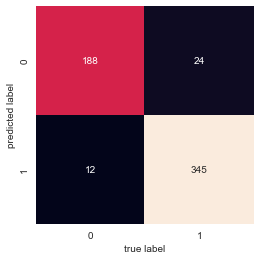

In [4]:
bayes_cls = bayes.GaussianNB()
y_pred = cross_val_predict(bayes_cls,x,y,cv=10)
model_test(y_pred,y)
plot_mat(y_pred,y)

# 逻辑回归

Precision: 0.8856099043390941
Recall: 0.9063561681982735
f1: 0.8941080135482191


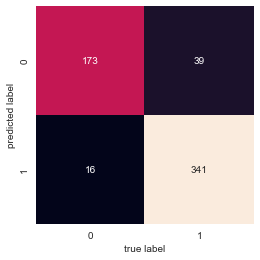

In [5]:
logistic_cls = LogisticRegression(solver='saga',tol=0.1)
y_pred_1 = cross_val_predict(logistic_cls,x,y,cv=10)
model_test(y_pred_1,y)
plot_mat(y_pred_1,y)

# SVM（高斯核）

Precision: 0.8920974049997357
Recall: 0.9250895287208136
f1: 0.9045422953536224


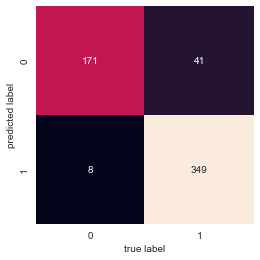

In [6]:
SVC_cls = SVC(kernel="rbf")
y_pred_2 = cross_val_predict(SVC_cls,x,y,cv=10)
model_test(y_pred_2,y)
plot_mat(y_pred_2,y)


# SVM（线性核）

Precision: 0.9473006183605517
Recall: 0.9546535052377115
f1: 0.9507444598337951


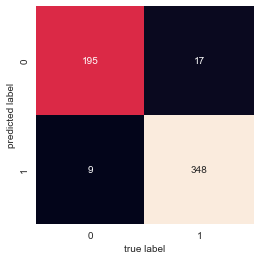

In [7]:
SVC_cls_1 = SVC(kernel="linear")
y_pred_3 = cross_val_predict(SVC_cls_1,x,y,cv=10)
model_test(y_pred_3,y)
plot_mat(y_pred_3,y)


# 决策树

Precision: 0.9112560118386976
Recall: 0.9060730593607306
f1: 0.9085019870896602


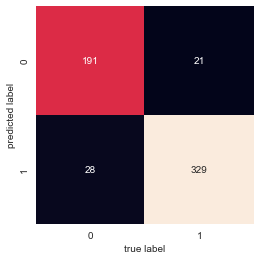

In [8]:
decision_cls = DecisionTreeClassifier()
y_pred_4 = cross_val_predict(decision_cls,x,y,cv=10)
model_test(y_pred_4,y)
plot_mat(y_pred_4,y)


# 随机森林

Precision: 0.9516476401881507
Recall: 0.9475086405529953
f1: 0.9494905658516377


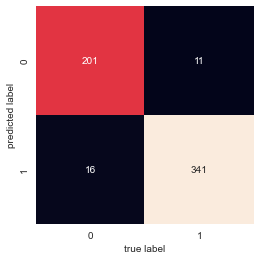

In [9]:
rand_forest_cls = RandomForestClassifier(n_estimators=10)
y_pred_5 = cross_val_predict(rand_forest_cls,x,y,cv=10)
model_test(y_pred_5,y)
plot_mat(y_pred_5,y)
